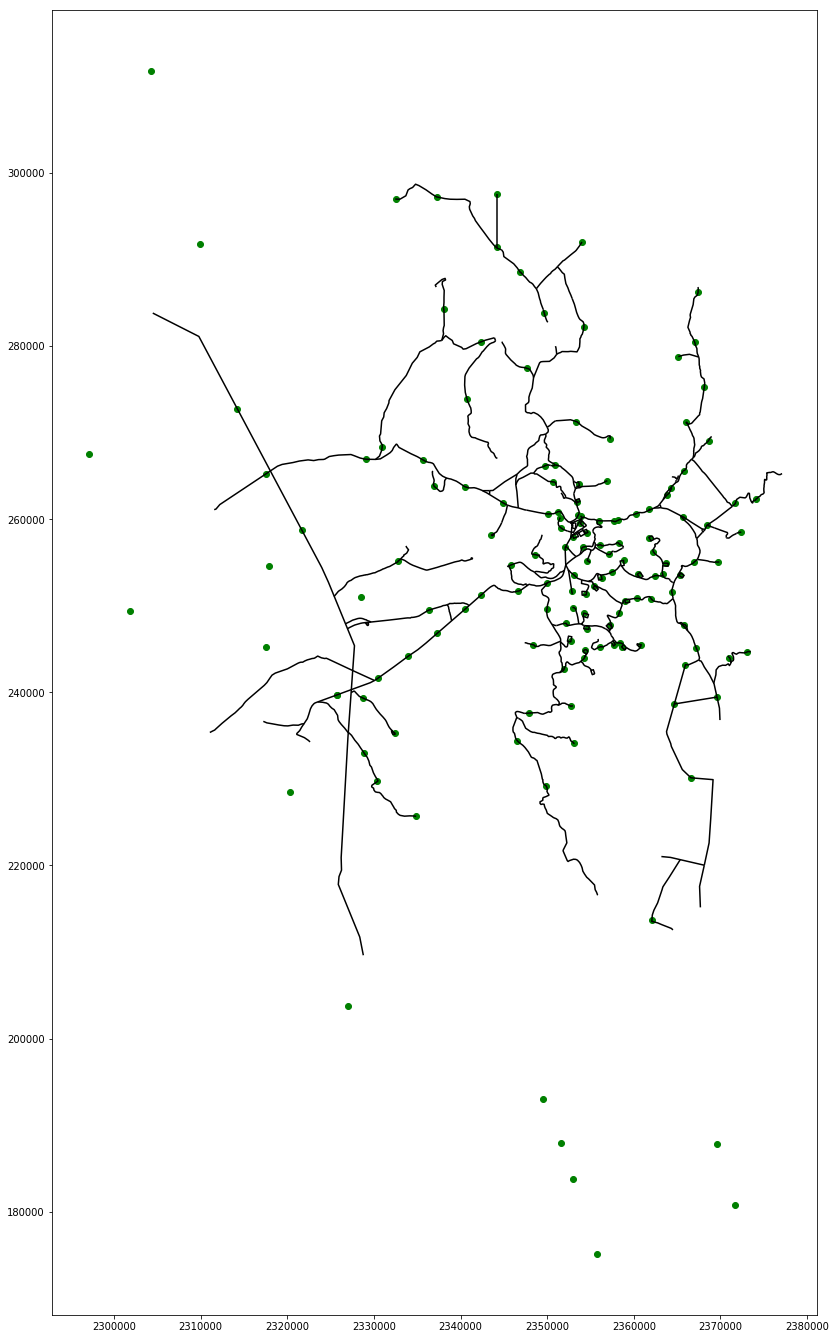

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

data_closet_at_road_geojson = '../../data/closest_at_road.geojson'
data_roads_pads_network_geojson = '../../data/roads_pads_network_w_stations.geojson'
local_coordinate = '''+proj=lcc +lat_1=36 +lat_2=37.25 
                 +lat_0=35.33333333333334 +lon_0=-119 
                 +x_0=609601.2192024384 +y_0=0 
                 +datum=NAD27 +units=us-ft +no_defs'''

plt.rcParams['figure.figsize'] = (30, 24)
df_stations = gpd.read_file(data_closet_at_road_geojson)
df_stations.crs = local_coordinate
df_roads = gpd.read_file(data_roads_pads_network_geojson)
df_roads.crs = local_coordinate

ax = df_roads.plot(color='black')
df_stations.plot(ax=ax, color='green')

plt.show()


In [2]:
import json

def pointToKey(p):
    # Easting#Northing
    key = str(int(p[0])) + "#" + str(int(p[1]))
    #print(key)
    return key

def create_vertex_dic(geojson_file):
    vertex_dic = {}
    with open(geojson_file) as f:
        data = json.load(f)
    for feature in data['features']:
        #print("+++ FEATURE +++")
        for line in feature['geometry']['coordinates']:
            #print("*** LINE ***")
            #print(line)
            for i in range(len(line)):
                point = line[i]
                key = pointToKey(point)
                point_info = vertex_dic.get(key)
                if point_info is None:
                    vertex_dic[key] = {}
                    vertex_dic[key]['id'] = len(vertex_dic)-1 # start from 0
                    vertex_dic[key]['adj'] = set()
                    point_info = vertex_dic[key]

                if i > 0:
                    left_key = pointToKey(line[i-1])
                    left_point_info = vertex_dic.get(left_key)
                    if left_point_info is not None:
                        point_info['adj'].add(left_point_info['id'])
                        left_point_info['adj'].add(vertex_dic[key]['id'])
                    else:
                        print("Left point is None!")
    return vertex_dic

vertex_dictionary = create_vertex_dic(data_roads_pads_network_geojson)

In [3]:
#print(vertex_dictionary)

In [4]:
import pandas as pd
from shapely.geometry import Point

vertices_x = [2349220, 2349119, 2349045, 2348964, 2348748]
vertices_y = [285174, 285470, 285767, 286110, 286595]

# convert lists to dataframe
df_vertices = pd.DataFrame({'Easting': vertices_x, 'Northing': vertices_y})

# creating a geometry column 
geometry = [Point(xy) for xy in zip(vertices_x, vertices_y)]

# coordinate reference system
crs = '+proj=lcc +lat_1=36 +lat_2=37.25 +lat_0=35.33333333333334 +lon_0=-119 +x_0=609601.2192024384 +y_0=0 +datum=NAD27 +units=us-ft +no_defs'

# creating a geographic data frame 
gdf_vertices = gpd.GeoDataFrame(df_vertices, crs=crs, geometry=geometry)

print(gdf_vertices)

   Easting  Northing                geometry
0  2349220    285174  POINT (2349220 285174)
1  2349119    285470  POINT (2349119 285470)
2  2349045    285767  POINT (2349045 285767)
3  2348964    286110  POINT (2348964 286110)
4  2348748    286595  POINT (2348748 286595)


In [5]:
from shapely.geometry import MultiLineString, shape, mapping
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
multi_geometry = MultiLineString(coords)

print(multi_geometry)
print()
print(mapping(df_roads.geometry[4]))

MULTILINESTRING ((0 0, 1 1), (-1 0, 1 0))

{'type': 'MultiLineString', 'coordinates': (((2365303.8379438836, 247962.56967246422), (2365382.8190851323, 247938.5384945637), (2365602.8370178044, 247763.65236139297), (2365870.807610467, 247529.53078238666), (2366031.590097308, 247326.43702848256), (2366200.8345094766, 247124.8085527229)),)}


In [6]:
print(df_roads)

     LAYER            Name    Shape_Leng  \
0    ROADS            None   3230.404648   
1    ROADS            None     54.203263   
2     PADS            None      0.000000   
3    ROADS            None   5145.614643   
4    ROADS            None   1163.688827   
5    ROADS            None    140.046460   
6    ROADS            None    130.514991   
7     PADS           84-30   1599.999982   
8    ROADS            None    929.663925   
9    ROADS            None   2501.774237   
10   ROADS            None   1946.330581   
11   ROADS            None    118.690417   
12   ROADS            None    159.166649   
13   ROADS            None    201.914896   
14   ROADS            None      8.854036   
15   ROADS            None      8.854036   
16   ROADS            None  22783.352743   
17   ROADS            None   3291.613540   
18   ROADS            None  19846.455087   
19   ROADS            None   8179.502077   
20   ROADS            None   3193.537662   
21   ROADS            None    93

In [7]:
from shapely.geometry import LineString
coords = [(0, 0), (1, 1)]
new_geometry = LineString(coords)
print(new_geometry)

LINESTRING (0 0, 1 1)


In [8]:
import json

def create_connection_list(geojson_file):
    connection_list = {}
    with open(geojson_file) as f:
        data = json.load(f)
    for feature in data['features']:
        print("+++ FEATURE +++")
        for line in feature['geometry']['coordinates']:
            print("*** LINE ***")
            print(line)
    return connection_list

data_roads_pads_network_geojson = '../../data/roads_pads_network_w_stations.geojson'
connection_list = create_connection_list(data_roads_pads_network_geojson)

+++ FEATURE +++
*** LINE ***
[[2355593.844717875, 257204.46780268667], [2355569.121894681, 257215.1737194363]]
+++ FEATURE +++
*** LINE ***
[[2354350.906109631, 258324.31693555415], [2354396.441451639, 258353.7197638899]]
+++ FEATURE +++
+++ FEATURE +++
+++ FEATURE +++
*** LINE ***
[[2365303.8379438836, 247962.56967246422], [2365382.8190851323, 247938.5384945637], [2365602.8370178044, 247763.65236139297], [2365870.807610467, 247529.53078238666], [2366031.590097308, 247326.43702848256], [2366200.8345094766, 247124.8085527229]]
+++ FEATURE +++
+++ FEATURE +++
*** LINE ***
[[2365090.289486468, 264721.2647715658], [2365028.3316051364, 264606.3936102241]]
+++ FEATURE +++
*** LINE ***
[[2355494.33492513, 242133.31027564406], [2355327.4313875586, 242604.63085530698], [2355109.701559713, 242527.52882220782], [2355044.63897413, 242504.48899522424], [2355211.5425117165, 242033.16808748245], [2355494.33492513, 242133.31027564406]]
+++ FEATURE +++
*** LINE ***
[[2352140.772576347, 262466.440869137

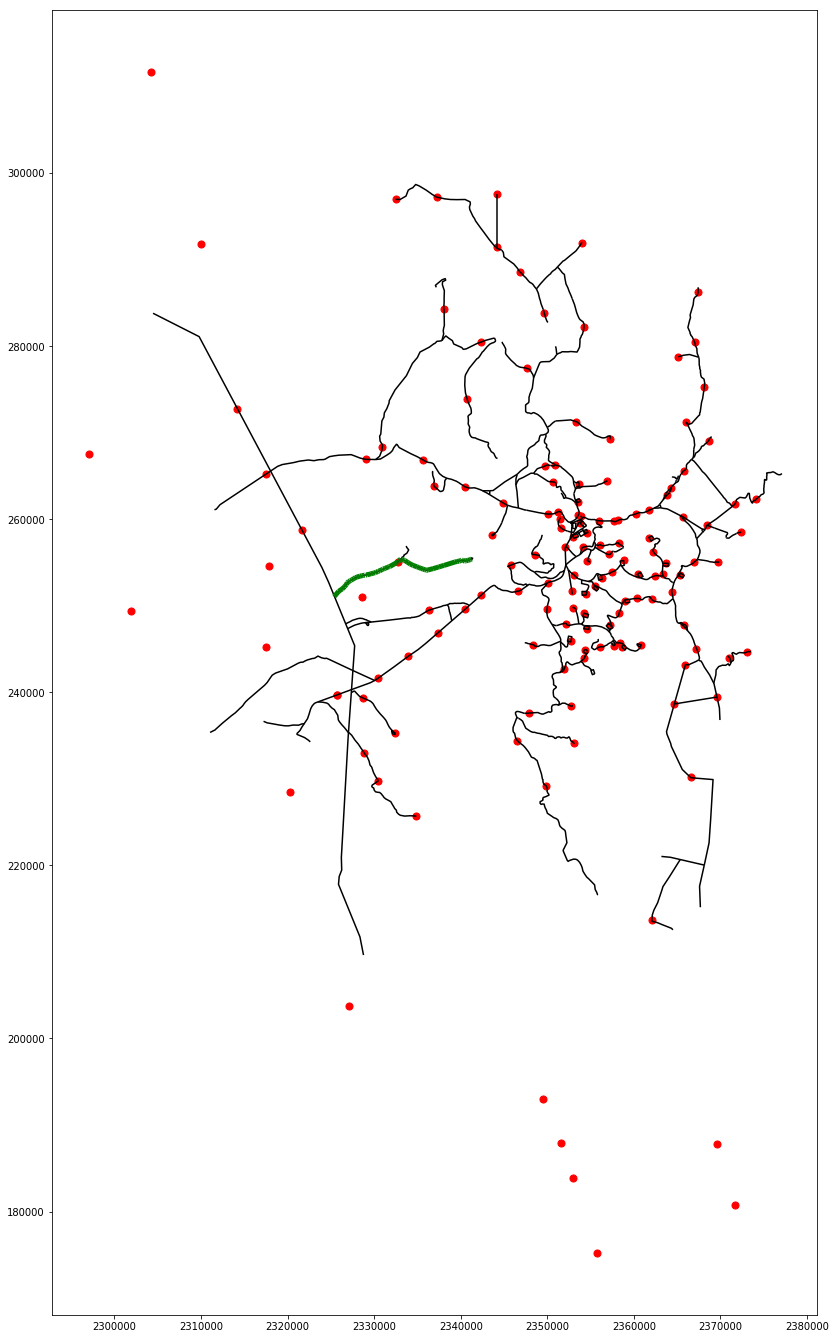

In [9]:
from matplotlib.pyplot import figure
from shapely.geometry import LineString

# coordinate reference system
crs = '+proj=lcc +lat_1=36 +lat_2=37.25 +lat_0=35.33333333333334 +lon_0=-119 +x_0=609601.2192024384 +y_0=0 +datum=NAD27 +units=us-ft +no_defs'

#vertices_x = [2330062, 2327545, 2327522, 2324752, 2324501, 2324309, 2323926, 2323503, 2323203, 2323077, 2322839, 2322614, 2322306, 2322012, 2321773, 2321577, 2321409, 2321213, 2320007, 2319320, 2318605, 2318226, 2317988, 2317638, 2317329, 2315451, 2315156, 2314988, 2314848, 2314666, 2314483, 2314301, 2313965, 2313516, 2312451, 2311708, 2311610, 2311399, 2311049]
#vertices_y = [241357, 242506, 242516, 243816, 243926, 243896, 243977, 244178, 243977, 243921, 243893, 243822, 243738, 243612, 243472, 243472, 243430, 243346, 242701, 242463, 242210, 241972, 241635, 241117, 240794, 239182, 238902, 238691, 238481, 238285, 238131, 237948, 237626, 237290, 236406, 235734, 235635, 235537, 235355]
vertices_x = [2341263, 2341215, 2341104, 2340863, 2340608, 2340545, 2340466, 2340311, 2340215, 2340133, 2340047, 2339963, 2339818, 2339599, 2339313, 2338055, 2337775, 2337512, 2337335, 2336826, 2336208, 2336117, 2336031, 2335854, 2335671, 2335465, 2335259, 2335128, 2334962, 2334505, 2334162, 2333881, 2333550, 2333458, 2333241, 2333144, 2333087, 2333047, 2332984, 2332904, 2332807, 2332771, 2332761, 2332692, 2332538, 2331817, 2331726, 2331560, 2331274, 2331097, 2331023, 2330926, 2330651, 2330508, 2330440, 2330262, 2330131, 2329914, 2329605, 2329216, 2329068, 2328982, 2328890, 2328753, 2328576, 2328364, 2327987, 2327844, 2327667, 2327478, 2327341, 2327215, 2327061, 2326901, 2326781, 2326598, 2326318, 2325895, 2325411, 2325391]
vertices_y = [255397, 255373, 255318, 255246, 255173, 255163, 255160, 255198, 255245, 255272, 255235, 255194, 255146, 255105, 255042, 254647, 254573, 254487, 254430, 254287, 254121, 254110, 254110, 254161, 254224, 254293, 254367, 254419, 254482, 254653, 254819, 254996, 255219, 255259, 255339, 255391, 255402, 255362, 255299, 255242, 255156, 255098, 255082, 255025, 254939, 254527, 254499, 254447, 254316, 254247, 254230, 254167, 254036, 253996, 253956, 253876, 253801, 253773, 253675, 253572, 253567, 253532, 253532, 253492, 253458, 253418, 253292, 253247, 253149, 253012, 252915, 252875, 252795, 252658, 252446, 252206, 251943, 251657, 251075, 251051]

coords = []

plt.rcParams['figure.figsize'] = (30, 24)

# construct connected lines
for i in range(len(vertices_x)):
    for j in range(i + 1, len(vertices_x)):
        vertex_id = vertex_dictionary.get(str(vertices_x[i]) + '#' + str(vertices_y[i]))['id']
        vertex_adjs = vertex_dictionary.get(str(vertices_x[j]) + '#' + str(vertices_y[j]))['adj']
        if vertex_id in vertex_adjs:
            conn = (vertices_x[i], vertices_y[i]), (vertices_x[j], vertices_y[j])
            line_string = LineString(conn)
            coords.append(line_string)
            
# creating lines' geographic dataframe 
gdf_lines = gpd.GeoDataFrame(crs=crs, geometry=coords)

# to avoid a feature covered by another, the sequence of plot matters
ax = df_roads.plot(color='black')
ax = gdf_lines.plot(ax=ax, color='green', linewidth=5)
df_stations.plot(ax=ax, color='red', markersize=50)

plt.show()

In [10]:
vertices_x = []
vertices_y = []
line = [[2327364.1430618074, 239962.54500890084], [2327558.395390302, 240064.70712938905], [2327644.859456226, 240122.34973064065], [2327750.537722558, 240122.34973064065], [2327952.2873190492, 239901.3862618059], [2328317.3577831388, 239517.10126923025], [2328686.0684890803, 239350.02929208154], [2328932.2135087997, 239238.49487106502], [2329422.176439643, 239036.74560263753], [2329633.532972306, 238921.46007205546], [2329864.1037053913, 238700.49627514184], [2330094.6747665554, 238306.6046744734], [2330277.2098345608, 238018.39101205766], [2330719.137428388, 237480.39241614938], [2331055.386427805, 237124.92921631038], [2331305.1713612974, 236827.10828964412], [2331430.063828051, 236625.35902123153], [2331564.5635590553, 236327.53842264414], [2331727.8847547174, 236010.5032955557], [2331881.5986861438, 235799.1467628926], [2332102.5621549636, 235568.57602980733], [2332246.6691502184, 235395.64789797366], [2332390.7758173943, 235318.79076822102], [2332404.9878652734, 235283.26060807105], [2332448.418418631, 235174.68410106003], [2332371.561616972, 235136.2557002306], [2332179.4192847162, 235155.46990063787], [2332092.955218807, 235280.3623673916], [2332044.919553727, 235424.46936264634], [2332025.7053533047, 235597.39749448]]
for i in range(len(line)):
    vertices_x.append(int(line[i][0]))
    vertices_y.append(int(line[i][1]))
    
print(vertices_x)
print(vertices_y)

[2327364, 2327558, 2327644, 2327750, 2327952, 2328317, 2328686, 2328932, 2329422, 2329633, 2329864, 2330094, 2330277, 2330719, 2331055, 2331305, 2331430, 2331564, 2331727, 2331881, 2332102, 2332246, 2332390, 2332404, 2332448, 2332371, 2332179, 2332092, 2332044, 2332025]
[239962, 240064, 240122, 240122, 239901, 239517, 239350, 239238, 239036, 238921, 238700, 238306, 238018, 237480, 237124, 236827, 236625, 236327, 236010, 235799, 235568, 235395, 235318, 235283, 235174, 235136, 235155, 235280, 235424, 235597]


In [11]:
vertices_x = []
vertices_y = []
line = [[2341263.3132207673, 255397.7734272098], [2341215.6535087973, 255373.9435712248], [2341104.629124552, 255318.4315431416], [2340863.033807218, 255246.49992847443], [2340608.9283443093, 255173.00499673188], [2340545.6876571327, 255163.34523914754], [2340466.021477893, 255160.81604473293], [2340311.7478363067, 255198.75232055783], [2340215.6430416405, 255245.54028472304], [2340133.44799605, 255272.09567780793], [2340047.4593228847, 255235.42383514345], [2339963.999844134, 255194.9586929828], [2339818.577890888, 255146.90629564226], [2339599.030101642, 255105.189187482], [2339313.172733724, 255042.3005337268], [2338055.400642976, 254647.81739881635], [2337775.260455221, 254573.4947128147], [2337512.2718079686, 254487.73733839393], [2337335.040207058, 254430.5658648163], [2336826.2141249776, 254287.6373448968], [2336208.7622758895, 254121.8401043117], [2336117.288049385, 254110.40574397147], [2336031.530674964, 254110.40574397147], [2335854.2990740538, 254161.86003740132], [2335671.3506210595, 254224.7486911416], [2335465.533119306, 254293.35452505946], [2335259.7159456313, 254367.67721106112], [2335128.221457973, 254419.13150447607], [2334962.424217388, 254482.02015823126], [2334505.0527568012, 254653.53457897902], [2334162.0239153057, 254819.3318195641], [2333881.8837275505, 254996.56342047453], [2333550.2892463803, 255219.53213463724], [2333458.814691797, 255259.55206772685], [2333241.563157797, 255339.59226197004], [2333144.3717511296, 255391.0465553999], [2333087.200277552, 255402.48091572523], [2333047.1803444773, 255362.46065455675], [2332984.291690722, 255299.57200081646], [2332904.251496464, 255242.4008553177], [2332807.060089797, 255156.64348089695], [2332771.3515213067, 255098.61689699529], [2332761.3229765594, 255082.32046681643], [2332692.7171426415, 255025.1489932239], [2332538.354262382, 254939.3919468969], [2331817.993826464, 254527.75727148354], [2331726.519599974, 254499.17169873416], [2331560.722359389, 254447.7174053043], [2331274.864991471, 254316.22291764617], [2331097.6333905607, 254247.6170837283], [2331023.3103764653, 254230.46587130427], [2330926.118969798, 254167.577217564], [2330651.6959622204, 254036.08272989094], [2330508.767114222, 253996.06279681623], [2330440.161608383, 253956.04286372662], [2330262.9300074726, 253876.00266948342], [2330131.4355197996, 253801.679655388], [2329914.1839857996, 253773.09408263862], [2329605.45822531, 253675.9026759714], [2329216.692270547, 253572.99376106262], [2329068.046242386, 253567.27690897882], [2328982.289196059, 253532.973827973], [2328890.8146414757, 253532.973827973], [2328753.603301719, 253492.9538948983], [2328576.3717008084, 253458.65114197135], [2328364.837346971, 253418.63088081777], [2327987.5057525486, 253292.85390140116], [2327844.57690455, 253247.1164600551], [2327667.34530364, 253149.92505338788], [2327478.679670468, 253012.71371364594], [2327341.4680026323, 252915.52197889984], [2327215.6910232157, 252875.50204581022], [2327061.327814892, 252795.46185156703], [2326901.2477544695, 252658.25051181018], [2326781.1876271367, 252446.7161579728], [2326598.2391741425, 252206.5959033072], [2326318.0989863873, 251943.60725605488], [2325895.0299506336, 251657.74988813698], [2325411.5757253733, 251075.40734877822], [2325391.9210487157, 251051.73239938915]]
for i in range(len(line)):
    vertices_x.append(int(line[i][0]))
    vertices_y.append(int(line[i][1]))
    
print(vertices_x)
print(vertices_y)

[2341263, 2341215, 2341104, 2340863, 2340608, 2340545, 2340466, 2340311, 2340215, 2340133, 2340047, 2339963, 2339818, 2339599, 2339313, 2338055, 2337775, 2337512, 2337335, 2336826, 2336208, 2336117, 2336031, 2335854, 2335671, 2335465, 2335259, 2335128, 2334962, 2334505, 2334162, 2333881, 2333550, 2333458, 2333241, 2333144, 2333087, 2333047, 2332984, 2332904, 2332807, 2332771, 2332761, 2332692, 2332538, 2331817, 2331726, 2331560, 2331274, 2331097, 2331023, 2330926, 2330651, 2330508, 2330440, 2330262, 2330131, 2329914, 2329605, 2329216, 2329068, 2328982, 2328890, 2328753, 2328576, 2328364, 2327987, 2327844, 2327667, 2327478, 2327341, 2327215, 2327061, 2326901, 2326781, 2326598, 2326318, 2325895, 2325411, 2325391]
[255397, 255373, 255318, 255246, 255173, 255163, 255160, 255198, 255245, 255272, 255235, 255194, 255146, 255105, 255042, 254647, 254573, 254487, 254430, 254287, 254121, 254110, 254110, 254161, 254224, 254293, 254367, 254419, 254482, 254653, 254819, 254996, 255219, 255259, 255339